In [3]:
# =====================================
# Car Sales Guided Lookup (Dataset-driven)
# =====================================

import pandas as pd
import random
from IPython.display import display, Markdown

# Load dataset
df = pd.read_csv("car_sales_data.csv")

# Normalize columns
df['Manufacturer'] = df['Manufacturer'].astype(str).str.strip()
df['Model'] = df['Model'].astype(str).str.strip()
df['Fuel type'] = df['Fuel type'].astype(str).str.strip()
df['Year of manufacture'] = pd.to_numeric(df['Year of manufacture'], errors='coerce')
df['Mileage'] = pd.to_numeric(df['Mileage'], errors='coerce')
df['Price'] = pd.to_numeric(df['Price'], errors='coerce')

def summarize_selection(data, manu, model, year, fuel, user="Friend"):
    count = len(data)
    avg_price = data['Price'].mean()
    min_price = data['Price'].min()
    max_price = data['Price'].max()
    avg_mileage = data['Mileage'].mean()
    min_mileage = data['Mileage'].min()
    max_mileage = data['Mileage'].max()
    fuel_dist = data['Fuel type'].value_counts().to_dict()
    market_avg = df['Price'].mean()
    better_value = "Below market average" if avg_price < market_avg else "Above market average"

    md = f"""
#  Hello {user}!
Here’s the info for your selection:

###  Selection
- Manufacturer: {manu}
- Model: {model}
- Year: {year}
- Fuel: {fuel}

### Insights
- Matches found: **{count}**
- Price range: **{min_price:,.0f} – {max_price:,.0f}**
- Average price: **{avg_price:,.0f}**
- Mileage range: **{min_mileage:,.0f} – {max_mileage:,.0f}**
- Average mileage: **{avg_mileage:,.0f}**
- Fuel distribution: **{fuel_dist}**
- Market comparison: **{better_value}**

###  Recommendation
{random.choice([
    "This looks like a solid choice. Check maintenance history before buying.",
    "Good balance between price and mileage — worth considering.",
    "If the mileage is higher than average, negotiate for a better deal."
])}
"""
    display(Markdown(md))

# ---- Interactive guided loop ----
print(" Welcome to the Car Sales Explorer!")
user = input("What's your name? ").strip() or "Friend"

while True:
    # Step 1: Manufacturer
    manu_options = sorted(df['Manufacturer'].unique())
    print("\nAvailable Manufacturers:")
    print(", ".join(manu_options))
    manu = input("Choose a Manufacturer: ").strip()
    if manu not in manu_options:
        print(" Invalid choice. Please pick from the list.")
        continue

    # Step 2: Model
    model_options = sorted(df[df['Manufacturer'] == manu]['Model'].unique())
    print(f"\nAvailable Models for {manu}:")
    print(", ".join(model_options))
    model = input("Choose a Model: ").strip()
    if model not in model_options:
        print(" Invalid choice. Please pick from the list.")
        continue

    # Step 3: Year
    year_options = sorted(df[(df['Manufacturer'] == manu) & (df['Model'] == model)]['Year of manufacture'].dropna().unique())
    print(f"\nAvailable Years for {manu} {model}:")
    print(", ".join(str(y) for y in year_options))
    try:
        year = int(input("Choose a Year: ").strip())
    except:
        print(" Invalid year. Try again.")
        continue
    if year not in year_options:
        print(" Invalid choice. Please pick from the list.")
        continue

    # Step 4: Fuel
    fuel_options = sorted(df[(df['Manufacturer'] == manu) & (df['Model'] == model) & (df['Year of manufacture'] == year)]['Fuel type'].unique())
    print(f"\nAvailable Fuel types for {manu} {model} {year}:")
    print(", ".join(fuel_options))
    fuel = input("Choose a Fuel type: ").strip()
    if fuel not in fuel_options:
        print("Invalid choice. Please pick from the list.")
        continue

    # Final filter
    selection = df[
        (df['Manufacturer'] == manu) &
        (df['Model'] == model) &
        (df['Year of manufacture'] == year) &
        (df['Fuel type'] == fuel)
    ]

    summarize_selection(selection, manu, model, year, fuel, user=user)

    again = input("\nWould you like to explore another car? (yes/no): ").strip().lower()
    if again != "yes":
        print(f"\nThanks for exploring, {user}! Goodbye ")
        break


 Welcome to the Car Sales Explorer!


What's your name?  ibraham



Available Manufacturers:
BMW, Ford, Porsche, Toyota, VW


Choose a Manufacturer:  BMW



Available Models for BMW:
M5, X3, Z4


Choose a Model:  Z4



Available Years for BMW Z4:
1984, 1985, 1986, 1987, 1988, 1989, 1990, 1991, 1992, 1993, 1994, 1995, 1996, 1997, 1998, 1999, 2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020, 2021, 2022


Choose a Year:  2021



Available Fuel types for BMW Z4 2021:
Petrol


Choose a Fuel type:  Petrol



#  Hi ibraham!
Here’s the info for your selection:

### 🚘 Selection
- Manufacturer: BMW
- Model: Z4
- Year: 2021
- Fuel: Petrol

### 🔎 Insights
- Matches found: **20**
- Price range: **51,684 – 64,627**
- Average price: **56,933**
- Mileage range: **4,915 – 27,157**
- Average mileage: **12,836**
- Fuel distribution: **{'Petrol': 20}**
- Market comparison: **Above market average**

###  Recommendation
If the mileage is higher than average, negotiate for a better deal.



Would you like to explore another car? (yes/no):  no



Thanks for exploring, ibraham! Goodbye 


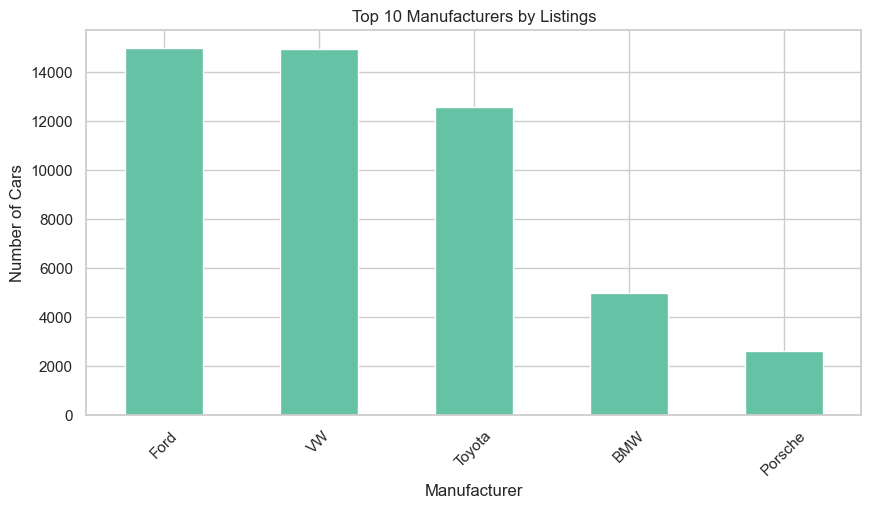

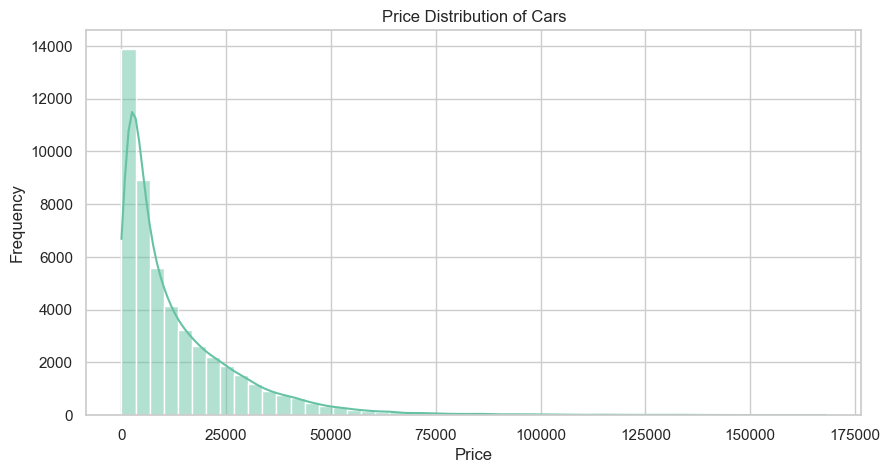

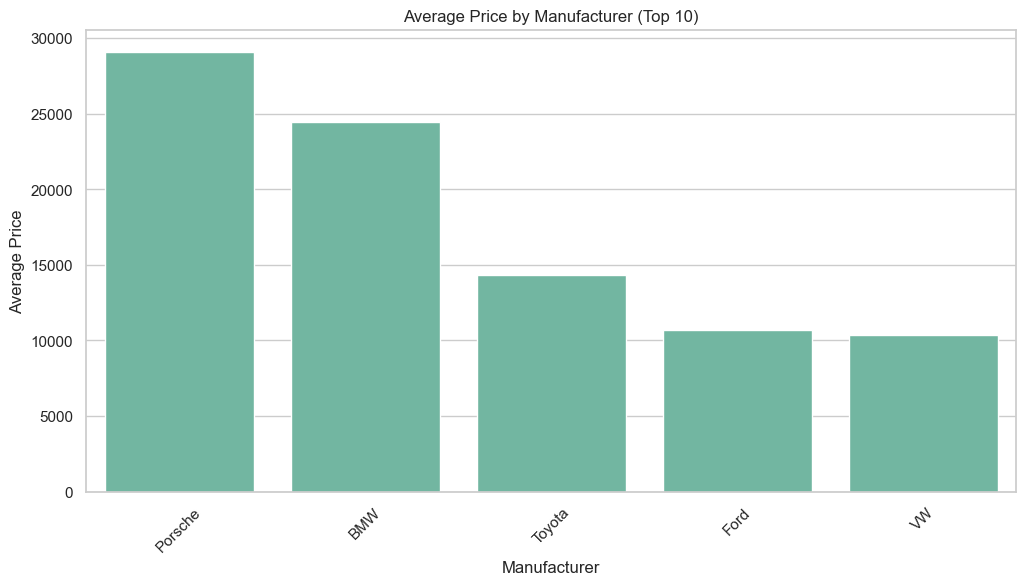

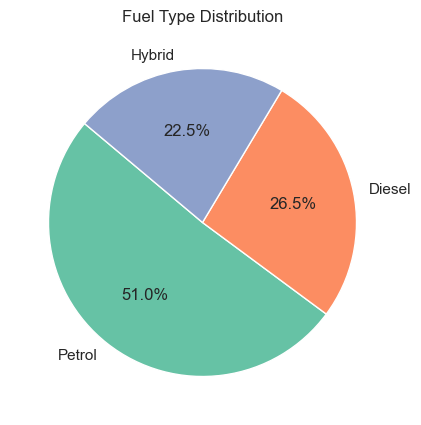

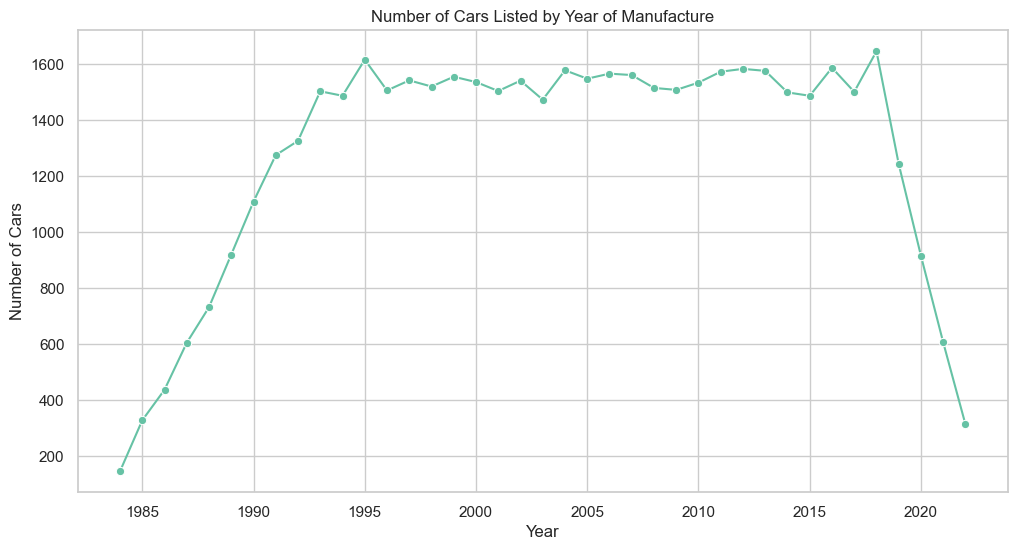

In [2]:
# =====================================
# Car Sales Charts & Visualizations
# =====================================

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load dataset
df = pd.read_csv("car_sales_data.csv")

# Clean data
df['Manufacturer'] = df['Manufacturer'].astype(str).str.strip()
df['Model'] = df['Model'].astype(str).str.strip()
df['Fuel type'] = df['Fuel type'].astype(str).str.strip()
df['Year of manufacture'] = pd.to_numeric(df['Year of manufacture'], errors='coerce')
df['Mileage'] = pd.to_numeric(df['Mileage'], errors='coerce')
df['Price'] = pd.to_numeric(df['Price'], errors='coerce')

# Style
sns.set(style="whitegrid", palette="Set2")

# 1. Top 10 Manufacturers by Count
plt.figure(figsize=(10,5))
df['Manufacturer'].value_counts().head(10).plot(kind='bar')
plt.title("Top 10 Manufacturers by Listings")
plt.xlabel("Manufacturer")
plt.ylabel("Number of Cars")
plt.xticks(rotation=45)
plt.show()

# 2. Price Distribution
plt.figure(figsize=(10,5))
sns.histplot(df['Price'], bins=50, kde=True)
plt.title("Price Distribution of Cars")
plt.xlabel("Price")
plt.ylabel("Frequency")
plt.show()

# 3. Average Price per Manufacturer (Top 10)
plt.figure(figsize=(12,6))
avg_price = df.groupby('Manufacturer')['Price'].mean().sort_values(ascending=False).head(10)
sns.barplot(x=avg_price.index, y=avg_price.values)
plt.title("Average Price by Manufacturer (Top 10)")
plt.xlabel("Manufacturer")
plt.ylabel("Average Price")
plt.xticks(rotation=45)
plt.show()

# 4. Fuel Type Distribution
plt.figure(figsize=(8,5))
df['Fuel type'].value_counts().plot(kind='pie', autopct='%1.1f%%', startangle=140)
plt.title("Fuel Type Distribution")
plt.ylabel("")
plt.show()

# 5. Yearly Trend of Listings
plt.figure(figsize=(12,6))
yearly_counts = df['Year of manufacture'].value_counts().sort_index()
sns.lineplot(x=yearly_counts.index, y=yearly_counts.values, marker="o")
plt.title("Number of Cars Listed by Year of Manufacture")
plt.xlabel("Year")
plt.ylabel("Number of Cars")
plt.show()
